In [2]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
from sklearn.decomposition import PCA

%matplotlib inline

In [7]:
# Load CSV into a DataFrame
data = pd.read_csv('df_main.csv')

# Display the first few rows of the data
print(data.head())

   cellidx      TBX6       BRA      CDX2      SOX2      SOX1  \
0        0  0.541198  0.228724  1.136731  2.638387  0.676792   
1        1  0.562709  0.153176  1.251472  0.776583  0.694261   
2        2  0.637590  0.240679  1.486664  3.752942  0.682324   
3        3  0.640359  0.184531  1.614646  4.068103  0.828319   
4        4  0.639919  0.153728  1.823096  2.079683  0.990685   

                   filename  timepoint  sample  
0  D2.5_A2_A02_003.fcs .csv        2.5       0  
1  D2.5_A2_A02_003.fcs .csv        2.5       0  
2  D2.5_A2_A02_003.fcs .csv        2.5       0  
3  D2.5_A2_A02_003.fcs .csv        2.5       0  
4  D2.5_A2_A02_003.fcs .csv        2.5       0  


In [22]:
#Remove the unwanted columns
numerical_data = data.drop(data.columns[[0,6,8]], axis=1) 


#Ensure only numerical data is used
numerical_data = numerical_data.select_dtypes(include=['float64', 'int64'])

#Shuffle the rows randomly
numerical_data = numerical_data.sample(frac=1, random_state=42).reset_index(drop=True)

#Select a million rows
selected_data = numerical_data.iloc[:2000000, :]

#Separate timepoints 

D2_data = selected_data[selected_data.iloc[:, 5].isin([2.0])]
D2_5_data = selected_data[selected_data.iloc[:, 5].isin([2.5])]
D3_data = selected_data[selected_data.iloc[:, 5].isin([3.0])]
D3_5_data = selected_data[selected_data.iloc[:, 5].isin([3.5])]
D4_data = selected_data[selected_data.iloc[:, 5].isin([4])]
D4_5_data = selected_data[selected_data.iloc[:, 5].isin([4.5])]
D5_data = selected_data[selected_data.iloc[:, 5].isin([5.0])]

#Choose equal amount from each 
desirable_amount_of_data= 7200

reduced_D2= D2_data.iloc[:desirable_amount_of_data, :] 
reduced_D2_5= D2_5_data.iloc[:desirable_amount_of_data, :] 
reduced_D3= D3_data.iloc[:desirable_amount_of_data, :] 
reduced_D3_5= D3_5_data.iloc[:desirable_amount_of_data, :] 
reduced_D4= D4_data.iloc[:desirable_amount_of_data, :] 
reduced_D4_5= D4_5_data.iloc[:desirable_amount_of_data, :] 
reduced_D5= D5_data.iloc[:desirable_amount_of_data, :] 


# Combine all reduced DataFrames
combined_equal_data = pd.concat([
    reduced_D2, 
    reduced_D2_5, 
    reduced_D3, 
    reduced_D3_5, 
    reduced_D4, 
    reduced_D4_5, 
    reduced_D5
], ignore_index=True)



#Selected data with not equal proportions in respect to timepoints
selected_data_1 = selected_data.drop(data.columns[7], axis=1) 

#Selected data with equal proportions in respect to timepoints
selected_data_2 = combined_equal_data.drop(data.columns[7], axis=1) 


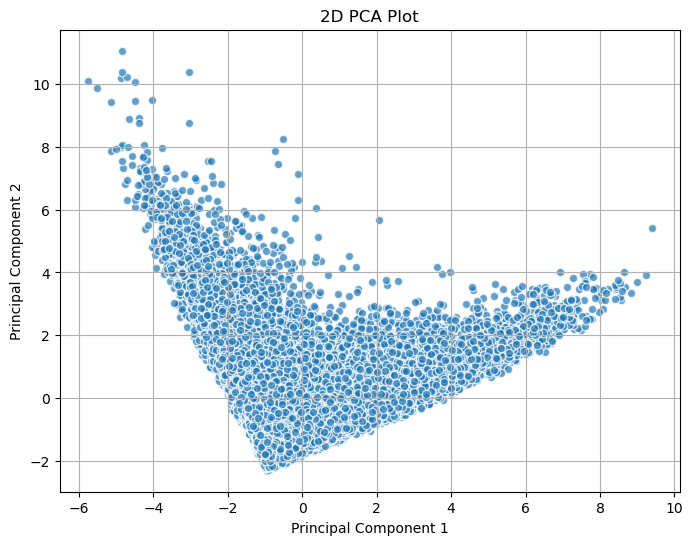

In [24]:
#Perform PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(selected_data_2)

#Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

#Plot the 2D PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolors='w')
plt.title('2D PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

#density plot 


/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


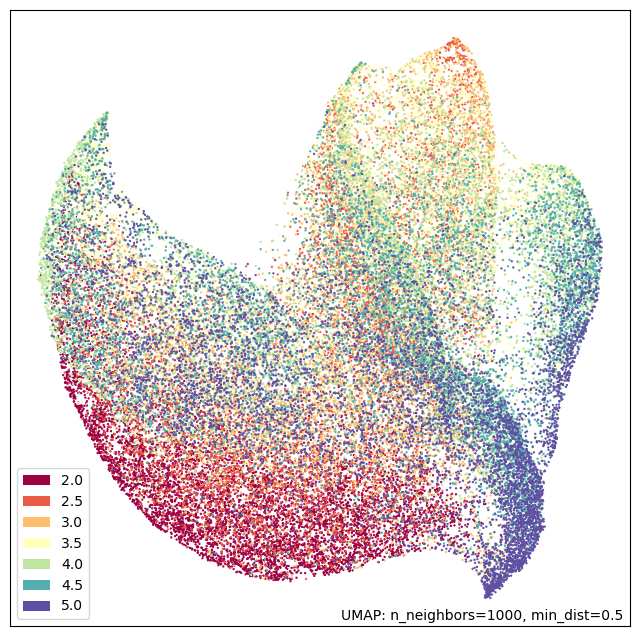

In [26]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import umap.plot

# Perform UMAP embedding with different metrics

reducer = umap.UMAP(
            n_neighbors=1000,
            n_components=2,
            min_dist=0.5,
            spread=1.5,
            metric="euclidean",
            random_state=42
        )
embedding = reducer.fit(selected_data_2)
    
datatimepoints=combined_equal_data["timepoint"]
umap.plot.points(embedding, labels=datatimepoints)
plt.show()



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from umap.parametric_umap import ParametricUMAP
from sklearn.preprocessing import StandardScaler

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


19866/19866 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 0.1623
Epoch 2/10
19866/19866 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - loss: 0.1573
Epoch 3/10
19866/19866 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 0.1562
Epoch 4/10
19866/19866 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 0.1563
Epoch 5/10
19866/19866 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - loss: 0.1561
Epoch 6/10
19866/19866 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - loss: 0.1561
Epoch 7/10
19866/19866 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - loss: 0.1560
Epoch 8/10
19866/19866 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - loss: 0.1561
Epoch 9/10
19866/19866 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - loss: 0.1563
Epoch 10/10
19866/19866 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - loss: 0.1560


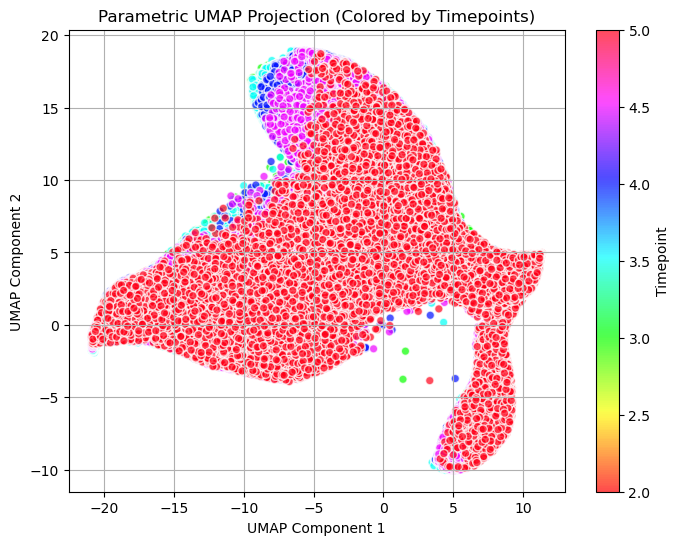

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from umap.parametric_umap import ParametricUMAP

# Initialize Parametric UMAP
embedder = ParametricUMAP()

# Fit and transform the dataset
embedding = embedder.fit_transform(selected_data_2)

# Convert to a DataFrame
umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

# Add the timepoint column for coloring
umap_df['timepoint'] = combined_equal_data.iloc[:, 5].values  # Assuming timepoints are in column index 5

# Define color palette
palette = sns.color_palette("hsv", as_cmap=True)  # HSV provides distinct colors

# Plot with colors
plt.figure(figsize=(8, 6))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], 
                      c=umap_df['timepoint'], cmap=palette, alpha=0.7, edgecolors='w')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Timepoint")

# Labels and title
plt.title("Parametric UMAP Projection (Colored by Timepoints)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid(True)

plt.show()


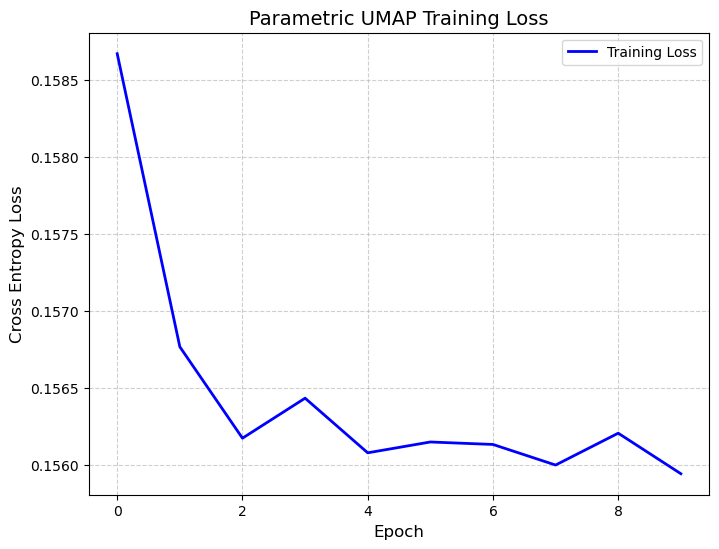

In [13]:
import matplotlib.pyplot as plt

# Extract the loss history
loss_history = embedder._history['loss']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the loss over epochs
ax.plot(loss_history, label='Training Loss', color='blue', linewidth=2)

# Labels and title
ax.set_ylabel('Cross Entropy Loss', fontsize=12)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_title('Parametric UMAP Training Loss', fontsize=14)

# Add grid and legend
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

# Show the plot
plt.show()
